# Exploration of Titanic Dataset

RMS Titanic was a passenger ship built in the United Kingdom which sunk in the early hours of 15th April, 1912 following a collision with an iceberg in the North Atlantic Ocean. It was the ship's maiden voyage, travelling from Southampton, UK to New York City, USA with stops along the way in Cherbourg, France and Queenstown (now Cobh), Ireland.

The purpose of this notebook is to explore the dataset of all passengers on board the doomed liner, making observations about different aspects of it and hopefully obtaining interesting insights along the way. This dataset is available online and I have downloaded it as a CSV file.

Let's firstly import <i>matplotlib.pyplot</i> and <i>seaborn</i> since we will be creating graphs from the dataset which will require these tools:

In [1]:
import matplotlib.pyplot as plt

# Must also include the following so that matplotlib graphs will display properly in Jupyter notebook cells
%matplotlib inline

import seaborn as sns

# Set the context to 'talk' now so that all graphs created will appear reasonably big (see seaborn notebook for explanation of contexts)
sns.set_context("talk")

Before we begin, here is a brief overview of the columns that exist in the Titanic dataset:

<table>
<tr><th><i>Column Name</i></th><th><i>Description</i></th></tr>
<tr><th><b>Class</b></th><td>Which class ticket the passenger held (1 = First, 2 = Second, 3 = Third).</td></tr>
<tr><th><b>Survived</b></th><td>Did the passenger survive the Titanic's sinking? (1 = Yes, 0 = No)</td></tr>
<tr><th><b>Name</b></th><td>The passenger's full name and title.</td></tr>
<tr><th><b>Age</b></th><td>How old the passenger was at the time of the Titanic's sinking.</td></tr>
<tr><th><b>Sibling or Spouse</b></th><td>Number of passenger's siblings or spouses aboard, if any.</td></tr>
<tr><th><b>Parents or Children</b></th><td>Number of passenger's parents or children aboard, if any.</td></tr>
<tr><th><b>Ticket No.</b></th><td>Number on this passenger's ticket.</td></tr>
<tr><th><b>Fare</b></th><td>The amount (in pounds) that this passenger's ticket cost.</td></tr>
<tr><th><b>Cabin</b></th><td>The passenger's cabin on the Titanic.</td></tr>
<tr><th><b>Embarked</b></th><td>Place of embarkment (S = Southampton, Q = Queenstown [now Cobh], C = Cherbourg)</td></tr>
<tr><th><b>Boat</b></th><td>The number/letter of the lifeboat the passenger escaped the ship on, if any.</td></tr>
<tr><th><b>Body</b></th><td>Body identification number if passenger died and body was recovered successfully.</td></tr>
<tr><th><b>Home/Dest</b></th><td>The passenger's home/destination.</td></tr>
</table>

Now we will import <i>pandas</i> and create a DataFrame object from the CSV file which holds the data. 

In [2]:
import pandas as pd

# Read in CSV file to a DataFrame object
df = pd.read_csv("datasets/titanic.csv")
# Display first 10 rows
df.head(10)

,Class,Survived,Name,Sex,Age,Sibsp,ParentsORChildren,Ticket,Fare,Cabin,Embarked,Boat,Body,HomeDest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Let's find out the details of the dataframe above using the pandas function <i>info()</i>:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Class                1309 non-null int64
Survived             1309 non-null int64
Name                 1309 non-null object
Sex                  1309 non-null object
Age                  1046 non-null float64
Sibsp                1309 non-null int64
ParentsORChildren    1309 non-null int64
Ticket               1309 non-null object
Fare                 1308 non-null float64
Cabin                295 non-null object
Embarked             1307 non-null object
Boat                 486 non-null object
Body                 121 non-null float64
HomeDest             745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


From this, we can see that:
- This is a DataFrame object.
- There are 1309 rows, indexed from 0 to 1308.
- There are 14 columns.
- Some columns are missing values (i.e. there are less than 1309 values in these columns).
- How much RAM is required to hold the DataFrame.

The dataset is quite large at 1309 rows. As we explore the dataset, we will aim to extract and analyse the aspects that may offer interesting insights.

Let's start our exploration by determining how many of the passengers were male and how many were female; this can be achieved using the <i>value_counts()</i> function which we came across in the pandas notebook:

In [4]:
gender_count = df['Sex'].value_counts()
gender_count

male      843
female    466
Name: Sex, dtype: int64

Now let's graph the above data for illustrative purposes:

(-1.0560821850305238,
 0.99999999999998246,
 -1.0143004635333679,
 1.097561285009657)

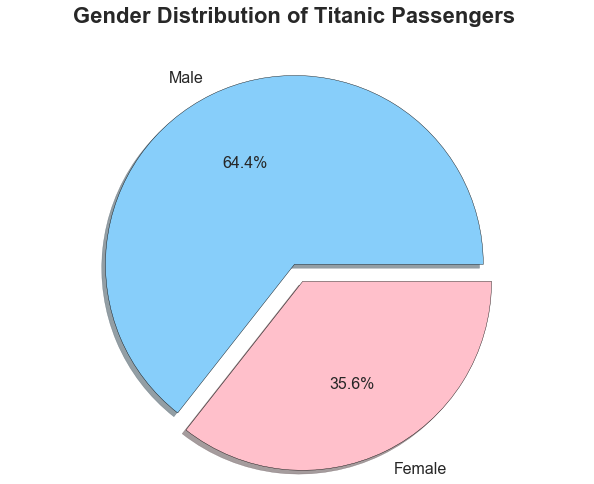

In [5]:
# Define colors for pie chart
colors = ['lightskyblue', 'pink']
# Plot pie chart
gender_count.plot(kind="pie", fontsize=16, explode = (0.1,0), autopct='%1.1f%%', shadow=True, colors=colors, labels=["Male","Female"])
# Add title to graph
plt.title("Gender Distribution of Titanic Passengers \n \n", fontsize=22, fontweight='bold')
# Remove the y-axis label
plt.ylabel("")
# Make pie chart appear as a perfect circle shape
plt.axis('equal')

The above visual representation of the figures helps us to see instantly how big a difference there was between the number of men and women on board the ship.
> <b>Pie charts</b> are best for representing percentage or proportional data which is useful in this case since we are examining the percentage of male and female passengers.

Let's now take a look at how many <i>survivors</i> there were:

In [6]:
survival_count = df['Survived'].value_counts()
survival_count

0    809
1    500
Name: Survived, dtype: int64

Now let's graph the above results:

(-1.0470246772353187,
 1.000000037729162,
 -1.0196260726981161,
 1.1052364040847624)

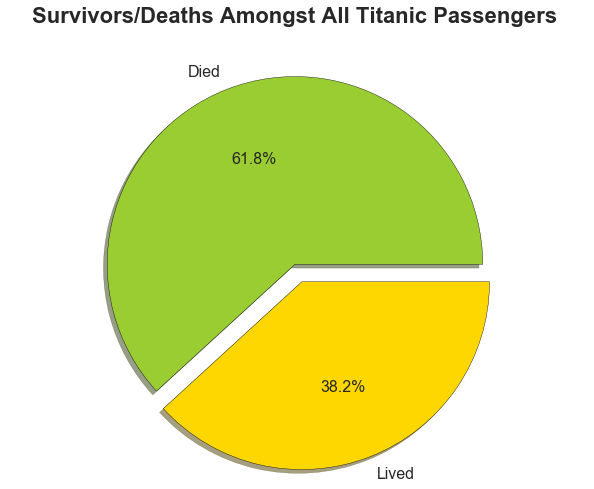

In [7]:
colors = ['yellowgreen', 'gold']
survival_count.plot(kind="pie", fontsize=16, explode = (0.1,0), autopct='%1.1f%%', shadow=True, colors=colors, labels=["Died","Lived"])
plt.ylabel("")
plt.title("Survivors/Deaths Amongst All Titanic Passengers \n \n", fontsize=22, fontweight='bold')
plt.axis('equal')

Let's now take a look at the gender distribution of those who survived:

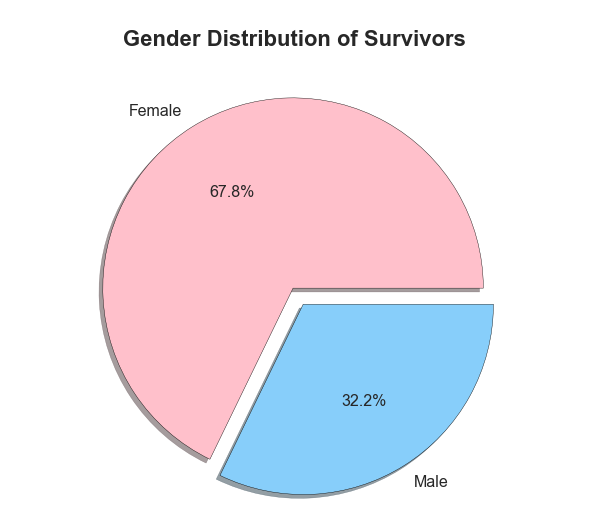

Sex
female    339
male      161
Name: Survived, dtype: int64


In [8]:
# Define the condition -> passenger survived
survived = df['Survived'] == 1

#Create a new data frame which only contains passengers whose data entries satisfied the previous condition
survivors = df[survived]

# Group the passengers in this new data frame by their sex
survivors_by_gender = survivors.groupby('Sex')

# Find the total number of male and female survivors using sum()
total_survivors_by_gender = survivors_by_gender['Survived'].sum()

# Plot the above as a pie chart
total_survivors_by_gender.plot(kind="pie", fontsize=16, explode = (0.1,0), autopct='%1.1f%%', shadow=True, colors=['pink','lightskyblue'],labels=['Female', 'Male'])

# Add a title for the graph
plt.title("\nGender Distribution of Survivors \n\n", fontsize=22, fontweight='bold')

# Remove the default y-axis label
plt.ylabel("")

# Make pie chart appear as perfect circle
plt.axis('equal')

# Display plot
plt.show()

# Print the details of the male/female survivors
print(total_survivors_by_gender)

After examining the number of male and female passengers who were amongst the survivors, let's now take a look at the percentage of all males and all females who survived and died:

(-1.0856634559191916,
 0.99999999999998246,
 -0.94775932278654162,
 1.0581856739454918)

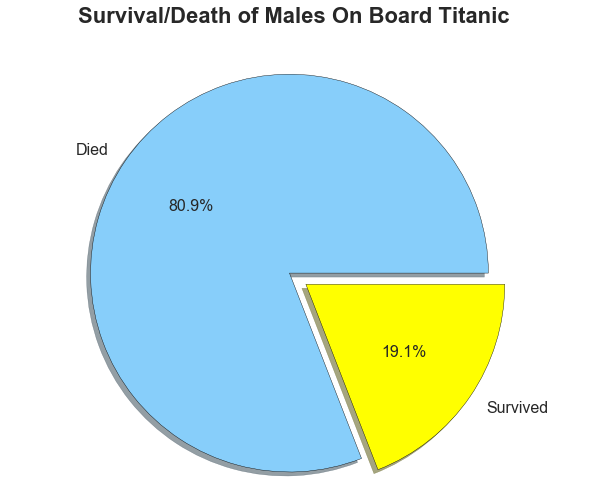

In [9]:
# Define the condition -> is a male
is_male = df['Sex'] == 'male'

# Create a new data frame which only contains passengers whose data entries satisfied the previous condition
males = df[is_male]

# Determine the number of males who survived and died
male_survival = males.Survived.value_counts()

# Plot the data frame as a pie chart
male_survival.plot(kind="pie", fontsize=16, explode = (0.1,0), autopct='%1.1f%%', shadow=True, colors=['lightskyblue','yellow'], labels=['Died','Survived'])

# Add a title for the graph
plt.title("Survival/Death of Males On Board Titanic \n\n", fontsize=22, fontweight='bold')

# Remove y-axis label
plt.ylabel("")

# Make chart appear as perfect circle
plt.axis('equal')

(-1.0791183044092114,
 1.0000000268221956,
 -1.0102065282489996,
 1.0926648713470826)

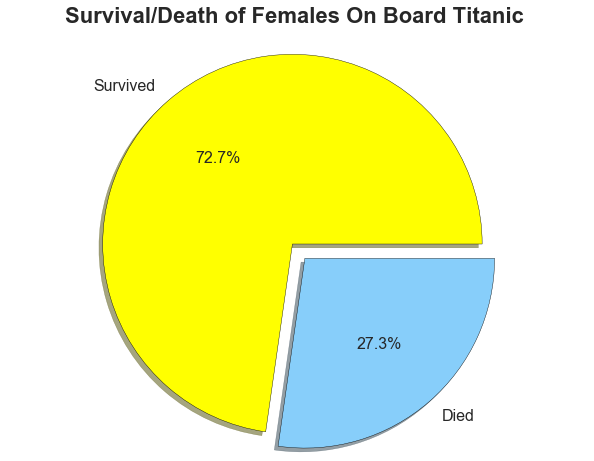

In [10]:
# Define the condition -> is a male
is_female = df['Sex'] == 'female'

#Create a new data frame which only contains passengers whose data entries satisfied the previous condition
females = df[is_female]

# Determine the number of males who survived and died
female_survival = females.Survived.value_counts()

# Plot the data frame as a pie chart
female_survival.plot(kind="pie", fontsize=16, explode = (0.1,0), autopct='%1.1f%%', shadow=True, colors=['yellow','lightskyblue'], labels=["Survived","Died"])

# Add a title for the graph
plt.title("Survival/Death of Females On Board Titanic \n", fontsize=22, fontweight='bold')

# Remove y-axis label
plt.ylabel("")

# Make pie chart appear as perfect circle
plt.axis('equal')

As we can see, females clearly had a far higher chance of surviving the sinking of the Titanic. This can be explained by the fact that women and children were allowed to board the lifeboats first when the ship was sinking.

A fundamental aspect of data analytics is extracting information from a dataset to calculate the rate of certain events given different conditions. This is particularly useful when analysing events which happen on a regular basis as it can allow one to calculate the probability of a given event happening again in the future based on past observations. 

The pandas function <i>crosstab()</i> allows the user to compute a cross-tabulation of two (or more) factors which proves to be an excellent means of visually representing the rate at which something occurred.

We have just looked at the rate of survival based on gender; let's now examine the rate of survival based on gender <i>and</i> class using crosstabs:

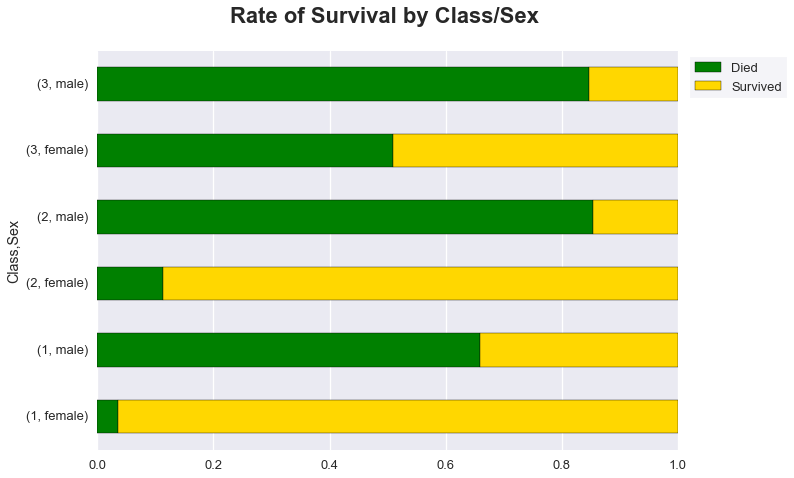

In [11]:
# Set style of plot using seaborn
sns.set_style('darkgrid')
# Compute cross-tabulation
survival_class_sex = pd.crosstab([df.Class, df.Sex], df.Survived.astype(bool))
survival_class_sex.div(survival_class_sex.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['green','gold'])
# Add title
plt.title("Rate of Survival by Class/Sex \n", fontsize=22, fontweight='bold')
# Add legend, adjusting position and frame
plt.legend(bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.5, labels=["Died","Survived"])

As is clear from the graph, males had a much lower survival rate than females across all classes. Third class females had the poorest survival rate out of all females on board at approximately 50%; conversely, almost all first and second class females survived.

Let's now calculate the rate of survival based on the lifeboat a given passenger was on:

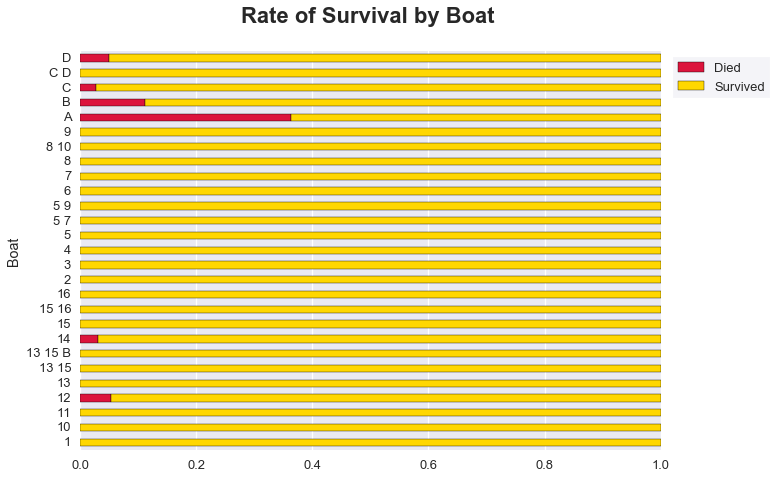

In [12]:
survival_by_boat = pd.crosstab([df.Boat], df.Survived.astype(bool))
survival_by_boat.div(survival_by_boat.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['Crimson','gold'])
plt.title("Rate of Survival by Boat \n", fontsize=22, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.5, labels=["Died","Survived"])

As we can see, although the vast majority of those who successfully boarded a lifeboat survived, not everyone was so lucky. Boat A saw the worst loss of life with almost 40% of its passengers dying.

### Passengers on Board Boat A:

In [13]:
boat_a = df[df['Boat'] == 'A']
boat_a

,Class,Survived,Name,Sex,Age,Sibsp,ParentsORChildren,Ticket,Fare,Cabin,Embarked,Boat,Body,HomeDest
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"
235,1,1,"Rheims, Mr. George Alexander Lucien",male,NaN,0,0,PC 17607,39.6000,NaN,S,A,NaN,"Paris / New York, NY"
317,1,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C,A,NaN,"Geneva, Switzerland / Radnor, PA"
603,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,A,NaN,"East Providence, RI"
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S,A,NaN,"Perkins County, SD"
630,3,1,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,A,NaN,NaN
881,3,1,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S,A,NaN,NaN
921,3,0,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S,A,NaN,NaN
968,3,0,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S,A,NaN,NaN
969,3,0,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S,A,NaN,NaN


Let's take a look at the distribution of sexes across the different lifeboats:

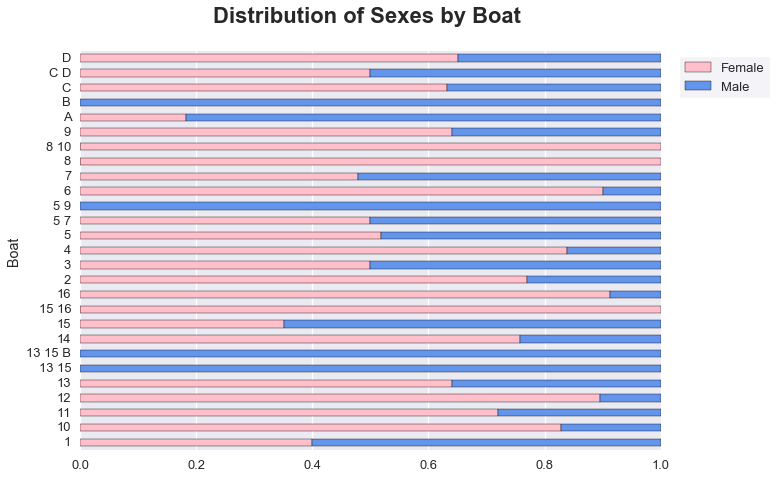

In [14]:
sns.set_style("darkgrid")
sexes_by_boat = pd.crosstab([df.Boat], df.Sex)
sexes_by_boat.div(sexes_by_boat.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['pink','CornflowerBlue'])
plt.title("Distribution of Sexes by Boat \n", fontsize=22, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.5, labels=["Female","Male"])

And the distribution of classes across the lifeboats:

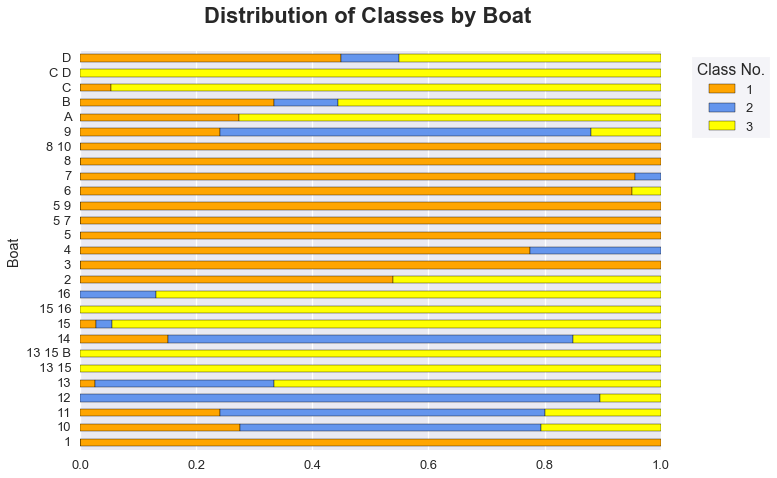

In [15]:
class_by_boat = pd.crosstab([df.Boat], df.Class)
class_by_boat.div(class_by_boat.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['orange','CornflowerBlue','yellow'])
plt.title("Distribution of Classes by Boat \n", fontsize=22, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.5, title="Class No.")

Let's also examine the survival rates of those who boarded at different stops (Remember: S = Southampton, Q = Queenstown, C = Cherbourg):

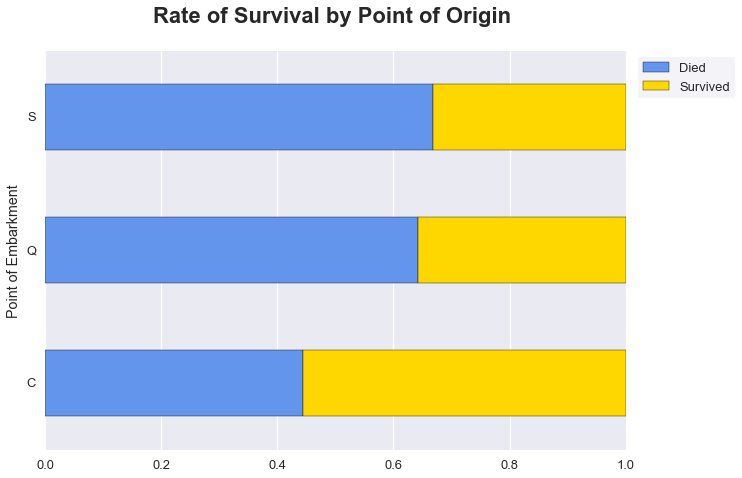

In [16]:
survival_by_stop = pd.crosstab([df.Embarked], df.Survived.astype(bool))
survival_by_stop.div(survival_by_stop.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['CornflowerBlue','gold'])
plt.title("Rate of Survival by Point of Origin \n", fontsize=22, fontweight='bold')
plt.ylabel("Point of Embarkment")
plt.legend(bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.5, labels=["Died","Survived"])

And the distribution of classes per stop made by the Titanic: 

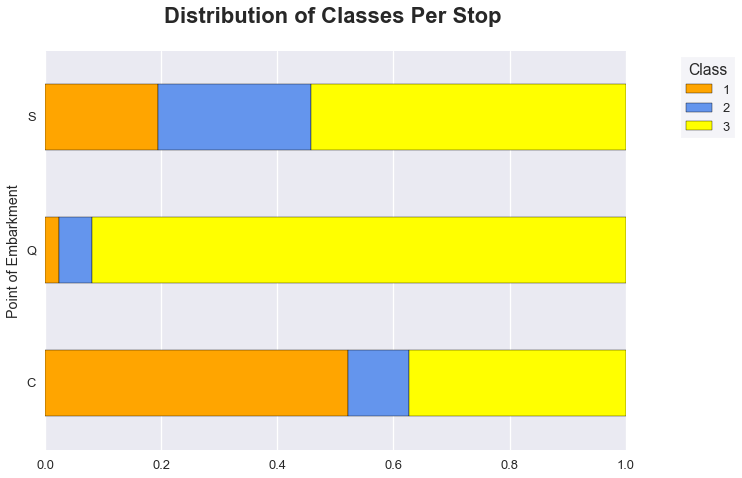

In [17]:
class_by_stop = pd.crosstab([df.Embarked], df.Class)
class_by_stop.div(class_by_stop.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['orange','CornflowerBlue','yellow'])
plt.title("Distribution of Classes Per Stop \n", fontsize=22, fontweight='bold')
plt.ylabel("Point of Embarkment")
plt.legend(bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.5, title="Class")

An interesting observation about the above two graphs is that the highest number of first class passengers boarded in Cherbourg, which also had the highest rate of survival. This makes sense since lower class passengers had a poorer chance of getting out alive due to their location and status on the ship.

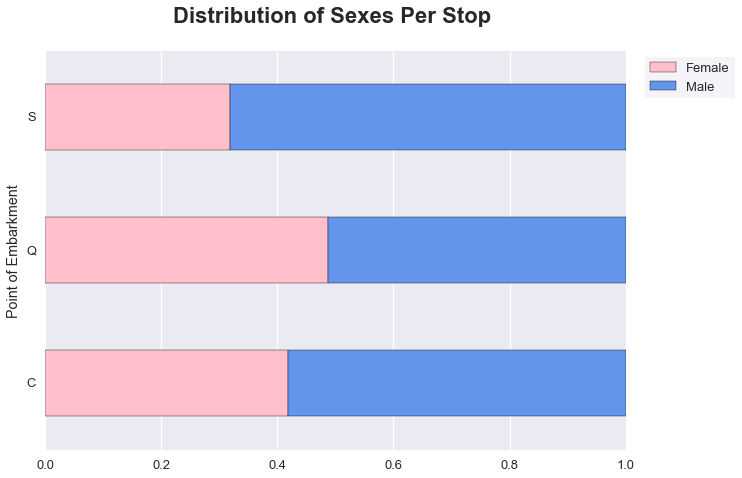

In [18]:
sex_by_stop = pd.crosstab([df.Embarked], df.Sex)
sex_by_stop.div(sex_by_stop.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['pink','CornflowerBlue'])
plt.title("Distribution of Sexes Per Stop \n", fontsize=22, fontweight='bold')
plt.ylabel("Point of Embarkment")
plt.legend(bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.5, labels=["Female","Male"])

Another interesting question we may ask is "What was the mean age of the passengers on board the ship?". Let's find out by simply using the pandas function <i>mean()</i>:

In [19]:
mean_age = df['Age'].mean()
mean_age

29.881137667304014

So we learn that the mean age of the passengers on board the ship was just under 29.9 years. 

The following bar graph represents the ages of all people on board; the passengers are graphed in alphabetical order, however their names are omitted as there are too many to list in a manner that is readable:

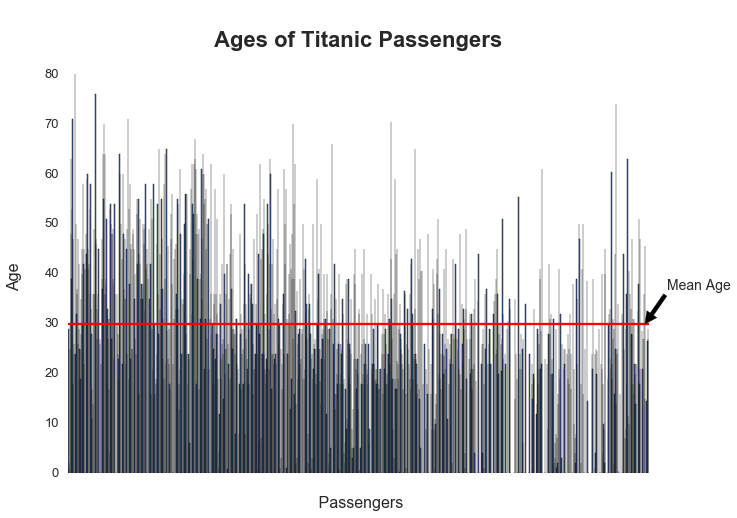

In [20]:
# Plot the ages as a bar graph
df['Age'].plot(kind="bar")

# Add horizontal line which represents mean age of passengers
plt.axhline(y=mean_age, color='r')

# Remove the tick labels for every passenger on the x-axis (too many to be able to properly read)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

# Add a title for the graph
plt.title("\n Ages of Titanic Passengers \n", fontsize=22, fontweight='bold')
# Add a label for the x-axis
plt.xlabel("\n Passengers", fontsize=16)
# Add a label for the y-axis
plt.ylabel("Age \n", fontsize=16)
# Add an arrow to label the 'mean age' line
plt.annotate('Mean Age', xy=(1300,mean_age), xytext=(1350,mean_age+7), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=14)

# Display the graph
plt.show()

The ages of people on board is visibly very varied, going up as high as approximately 80 years old.

A very useful means of visually representing data which aims to show the distribution of data is the <i>histogram</i>. This type of graph, which looks similar to a bar graph, displays relative frequencies of data values. 

Let's use this type of graph to represent the relative frequencies of different ages:

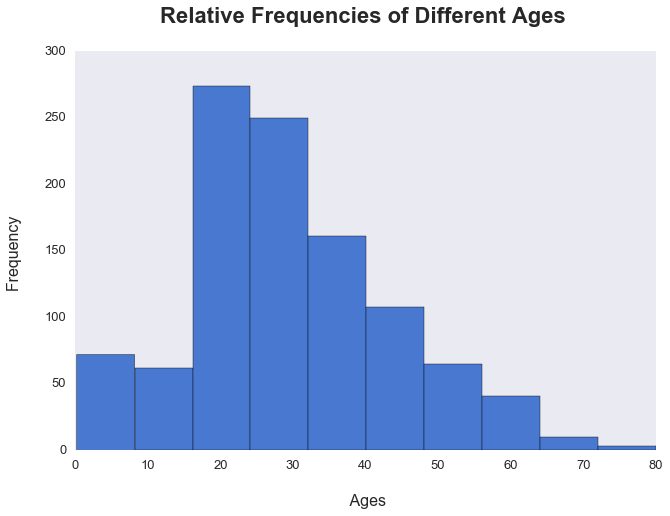

In [21]:
sns.set_palette("muted")

df.Age.hist(grid=False)
plt.title("Relative Frequencies of Different Ages \n", fontsize=22, fontweight="bold")
plt.ylabel("Frequency \n", fontsize=16)
plt.xlabel("\n Ages", fontsize=16)

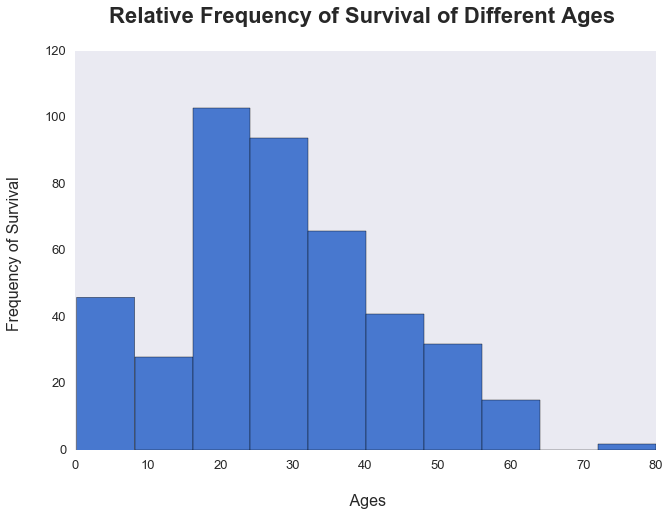

In [22]:
sns.set_palette("muted")

survived = df['Survived'] == 1
df4 = df[survived]
df4.Age.hist(grid=False)
plt.title("Relative Frequency of Survival of Different Ages \n", fontsize=22, fontweight='bold')
plt.ylabel("Frequency of Survival \n", fontsize=16)
plt.xlabel("\n Ages", fontsize=16)

Let's now take a look at the fares paid by passengers on board RMS Titanic:

In [23]:
mean_fare = df['Fare'].mean()
mean_fare

33.29547928134572

So we learn that the average fare paid by passengers of the ship was just under £33.30. Let's graph the fares paid using the <i>plot()</i> function. The more opaque the bar, the more passengers there were who paid the fare that the bar represents:

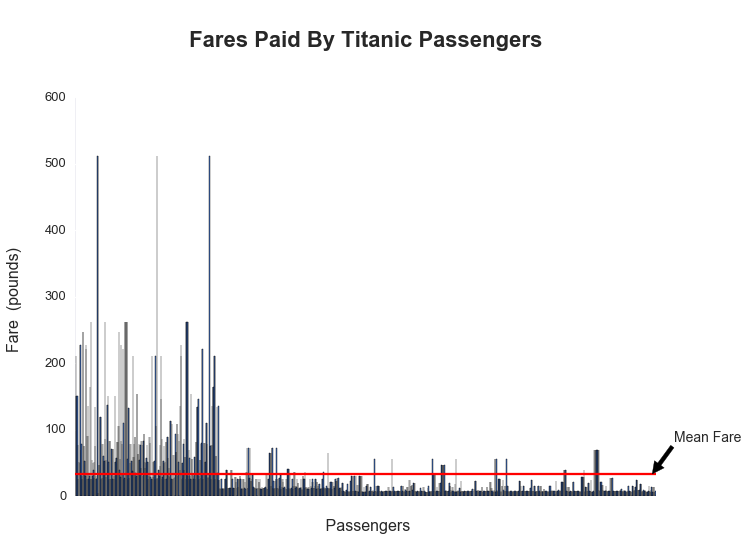

In [24]:
# Plot all fares paid by passengers as a bar graph
df['Fare'].plot(kind="bar")

# Remove the tick labels for every passenger on the x-axis (too many to properly read)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

# Add a title
plt.title("\n Fares Paid By Titanic Passengers \n\n", fontsize=22, fontweight="bold")
# Label the x-axis
plt.xlabel("\n Passengers", fontsize=16)
# Label the y-axis
plt.ylabel("Fare  (pounds) \n", fontsize=16)

# Add horizontal line which represents mean fare
plt.axhline(y=mean_fare, color='r')

# Add an arrow which points to the mean fare
plt.annotate('Mean Fare', xy=(1300,mean_fare), xytext=(1350,mean_fare+50), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=14)

#Display the plot
plt.show()

Another means of representing the frequency within a data set is a <b>boxplot</b>:

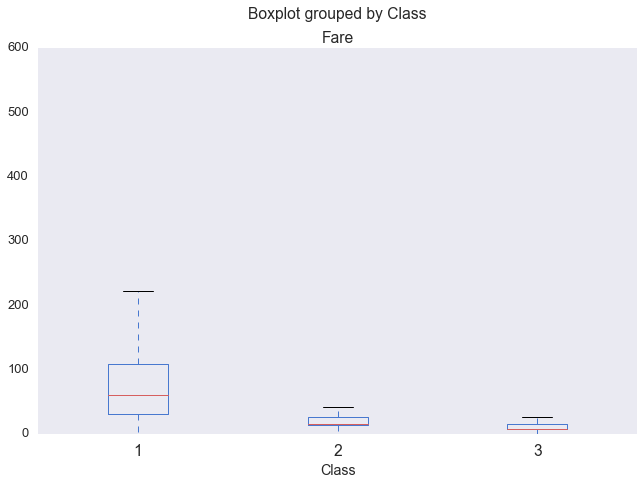

In [25]:
df.boxplot(column='Fare', by='Class', grid=False)

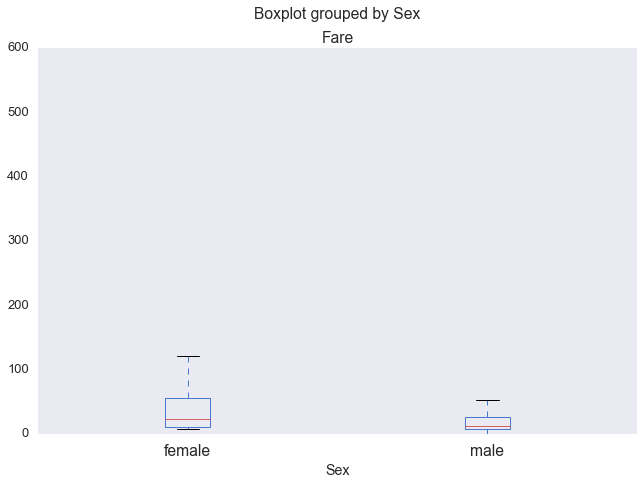

In [26]:
df.boxplot(column='Fare', by='Sex', grid=False)

In the above examples, the blue dotted lines represent the outliers in the dataset while the values contained within the boxes are those which appeared most frequently.

It's interesting to note in the above graphs above that there were a few passengers who paid a significantly higher sum than most other passengers on board; let's take a look at their entries in the dataframe. 

In [27]:
df[df.Fare > 400]

,Class,Survived,Name,Sex,Age,Sibsp,ParentsORChildren,Ticket,Fare,Cabin,Embarked,Boat,Body,HomeDest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


These tickets were purchased for Charlotte Drake Cardeza, wife of James Warburton Martinez Cardeza, and their son Thomas Drake Martinez Cardeza, as well as their two servants. The reason these tickets were so expensive was because Charlotte and her son were staying in the most expensive suite on the Titanic; it featured two bedrooms, a sitting room, and a private 50 foot promenade.

In [28]:
df['HomeDest'].value_counts()

New York, NY                                 64
London                                       14
Montreal, PQ                                 10
Paris, France                                 9
Cornwall / Akron, OH                          9
Philadelphia, PA                              8
Winnipeg, MB                                  8
Wiltshire, England Niagara Falls, NY          8
Belfast                                       7
Brooklyn, NY                                  7
Sweden Winnipeg, MN                           7
Rotherfield, Sussex, England Essex Co, MA     5
Bulgaria Chicago, IL                          5
Somerset / Bernardsville, NJ                  5
Sweden Worcester, MA                          5
Haverford, PA / Cooperstown, NY               5
Ottawa, ON                                    5
Minneapolis, MN                               4
Syria New York, NY                            4
Ruotsinphytaa, Finland New York, NY           4
Bryn Mawr, PA                           

Clearly, the place which was the hometown of the greatest number of passengers on board is New York. This is not too surprising since this was the ship's destination. 

A graph which represents the hometowns of all passengers, however, would be quite untidy looking as there would be a large number of places represented that were the hometowns of single passengers. Overall there are:

In [29]:
home_counts = df['HomeDest'].value_counts()
len(home_counts)

369

different locations to be accounted for. Let's instead graph the top 20 places from which the most passengers hailed:

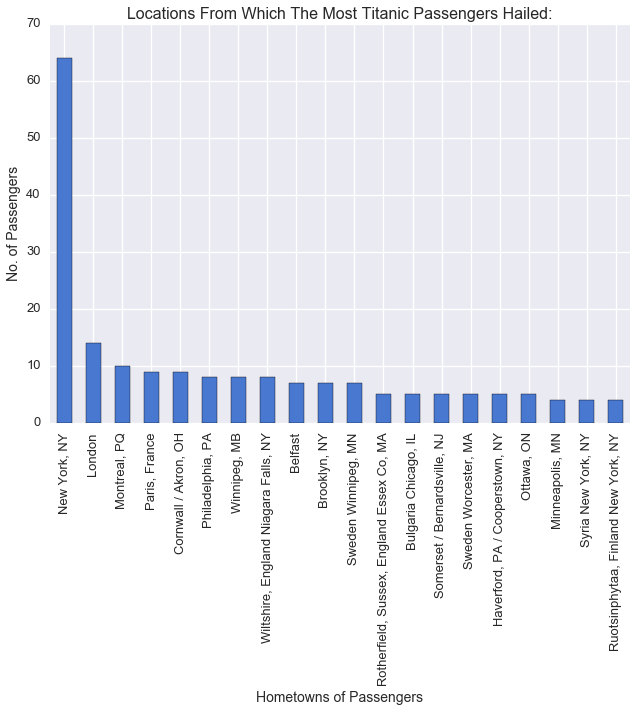

In [30]:
# Extract the top 20 places from which the most passengers hailed
top_20 = home_counts.head(20)

# Plot this information as a bar chart
top_20.plot(kind="bar")

# Add a title
plt.title("Locations From Which The Most Titanic Passengers Hailed:", fontsize=16)
# Add a label for the x-axis
plt.xlabel("Hometowns of Passengers", fontsize=14)
# Add a label for the y-axis
plt.ylabel("No. of Passengers", fontsize=14)

sns.set_style("whitegrid")
# Remove the top and right axes using seaborn's despine() method
sns.despine()

Let's see how many people boarded the ship at its different stops. As a reminder, the possible places are Southampton (<b>S</b>), Cherbourg (<b>C</b>), and Queenstown (<b>Q</b>).

S    914
C    270
Q    123
Name: Embarked, dtype: int64


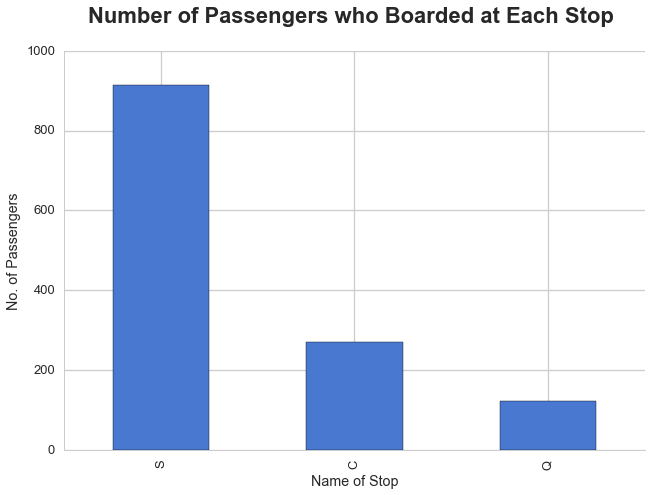

In [31]:
sns.set_palette("muted")

# Find out how many people boarded at each stop
stop_counts = df['Embarked'].value_counts()
# Plot as a bar graph
stop_counts.plot(kind="bar")

plt.title("Number of Passengers who Boarded at Each Stop \n", fontsize=22, fontweight='bold')
plt.xlabel("Name of Stop")
plt.ylabel("No. of Passengers")


sns.despine()
sns.set_style("darkgrid")
# Print details of each stop
print(stop_counts)

By far the greatest number of people boarded in Southampton - this was the Titanic's first point of departure.

Let's try to figure out if being a child or having a child increased your chances of survival:

In [32]:
# Define first condition - were a parent or a child to at least one person
parents_or_children = df['ParentsORChildren'] > 0
# Define second condition - survived
survived = df['Survived'] == 1
# Define third condition - died
died = df['Survived'] == 0

# Combine condition 1 and 2 to create a new condition - parent/child AND survived
p_or_c_survivors = df[parents_or_children & survived]
# Combine condition 1 and 3 to create another new condition - parent/child AND died
p_or_c_deaths = df[parents_or_children & died]

# Calculate total number of parents/children by adding the number of rows in the two previous new data frames
print "Number of Parents/Children on Board:", (len(p_or_c_survivors) + len(p_or_c_deaths))
# Calculate the number of parent/child survivors by finding the number of rows in the corresponding data frame
print "Number who survived:", len(p_or_c_survivors)
# Calculate the number of parent/child deaths by finding the number of rows in the corresponding data frame
print "Number who died:", len(p_or_c_deaths)

Number of Parents/Children on Board: 307
Number who survived: 164
Number who died: 143


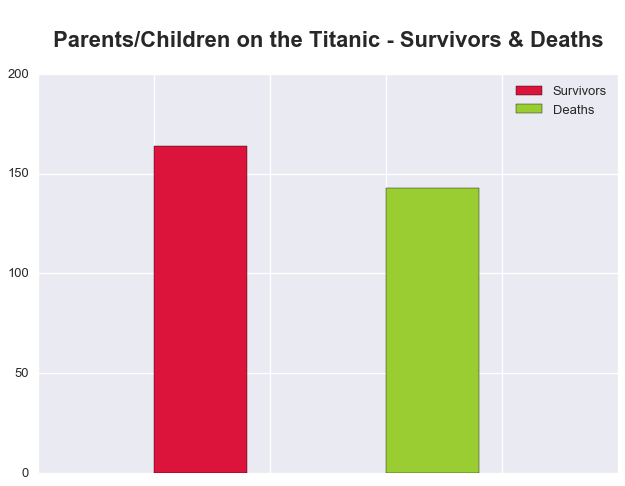

In [33]:
# Plot the parent/child survivors using matplotlib's bar() method
plt.bar(1, len(p_or_c_survivors), label="Survivors", color="Crimson")
# Plot the parent/child deaths using the same means as above
plt.bar(3, len(p_or_c_deaths), label="Deaths", color="yellowgreen")

# Set the graph style using seaborn
sns.set_style("ticks")
# Remove the top and right axes using seaborn
sns.despine()

# Add a title to the graph
plt.title("\n Parents/Children on the Titanic - Survivors & Deaths \n", fontsize=22, fontweight='bold')

# Define the limits of the axes
plt.axis([0,5,0,200])
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
# Add a legend
plt.legend()
# Display the graph
plt.show()

As we can see from the graph, there is not a significant difference between the number of parents or children who survived and the number who died. 

Given that women and children were given priority when loading the lifeboats, perhaps a possible explanation for these results is that most of the parent/child deaths accounted for are deaths of fathers. 

Let's investigate this hypothesis to see if it is correct: 

In [34]:
# Define condition - is a male
is_male = df['Sex'] == 'male'

# Combine the new condition with two of the previous ones to find male parent/child passengers who died
male_pc_deaths = df[is_male & parents_or_children & died]
# Find the number of male parent/child deaths using the len() function
no_of_male_pc_deaths = len(male_pc_deaths)

# Display the number of these deaths
no_of_male_pc_deaths

91

We have now learned that of the 143 parent/children deaths, 91 of these were males. Therefore, 52 were female:

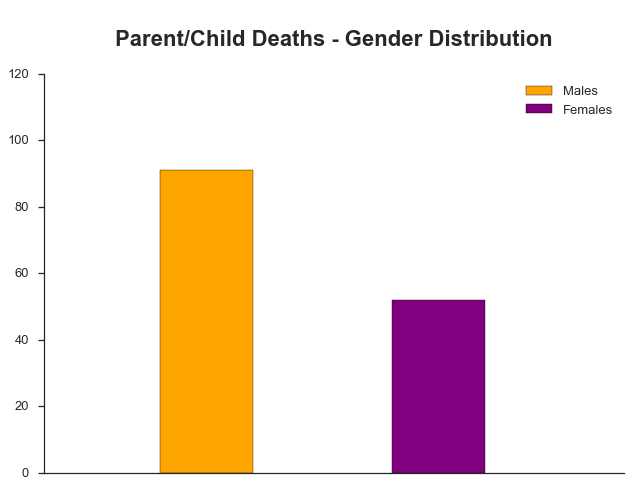

In [35]:
# Calculate the number of female parent/child deaths by subtracting the male p/c deaths from all p/c deaths 
no_of_female_pc_deaths = len(p_or_c_deaths) - no_of_male_pc_deaths

# Plot the male parent/child deaths
plt.bar(1, no_of_male_pc_deaths, label="Males", color="orange")
# Plot the female parent/child deaths
plt.bar(3, no_of_female_pc_deaths, label="Females", color="purple")

# Set graph style
sns.set_style("ticks")
# Remove top and right axes
sns.despine()

# Add graph title
plt.title("\n Parent/Child Deaths - Gender Distribution \n", fontsize=22, fontweight='bold')

# Define axes' limits
plt.axis([0,5,0,120])
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
# Add a legend
plt.legend()
# Display graph
plt.show()

Let's find out how many of the male deaths were parents and how many were children:

In [36]:
# Define condition - is a child
is_child = df['Age'] < 18

# Combine above condition with previous conditions to create new condition
male_child_deaths = df[is_male & parents_or_children & died & is_child]
# Calculate number of male child deaths using len() function
no_of_male_child_deaths = len(male_child_deaths)

# Display number of male child deaths
no_of_male_child_deaths

32

Quite surprisingly, over a third of the male deaths were children. 

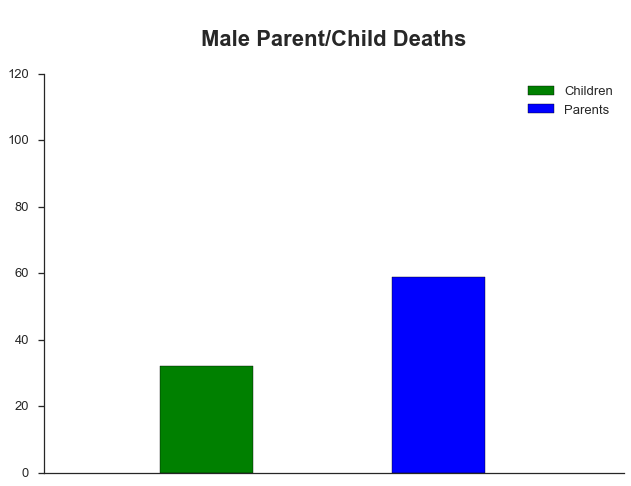

In [37]:
# Calculate number of male parent deaths by subtracting child deaths from all parent/child deaths
no_of_male_parent_deaths = no_of_male_pc_deaths - no_of_male_child_deaths

# Plot number of male child deaths as bar
plt.bar(1, no_of_male_child_deaths, label="Children", color="g")
# Plot number of male parent deaths as bar
plt.bar(3, no_of_male_parent_deaths, label="Parents", color="b")

# Set graph style
sns.set_style("ticks")
# Remove top and right axes
sns.despine()

# Add graph title
plt.title("\n Male Parent/Child Deaths \n", fontsize=22, fontweight='bold')

# Set axes' limits
plt.axis([0,5,0,120])
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
# Add a legend
plt.legend()

# Display graph
plt.show()

Let's also investigate the number of female child/parent deaths:

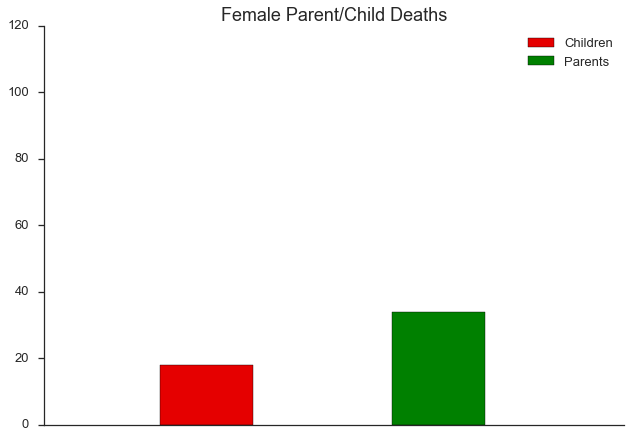

Number of female child deaths: 18
Number of female parent deaths: 34


In [38]:
# Define condition
is_female = df['Sex'] == 'female'

# Combine new condition with previous conditions to create new condition
female_child_deaths = df[is_female & parents_or_children & died & is_child]
# Calculate number of female child deaths using len() function
no_of_female_child_deaths = len(female_child_deaths)
# Calculate number of female parent deaths by subtracting female child deaths from all female parent/child deaths
no_of_female_parent_deaths = no_of_female_pc_deaths - no_of_female_child_deaths

# Plot number of female child deaths as bar
plt.bar(1, no_of_female_child_deaths, label="Children", color="#E50000")
# Plot number of female parent deaths as bar
plt.bar(3, no_of_female_parent_deaths, label="Parents", color="g")

# Set graph style
sns.set_style("ticks")
# Remove top and right axes
sns.despine()

# Add graph title
plt.title("Female Parent/Child Deaths", fontsize=18)

# Set axes' limits
plt.axis([0,5,0,120])
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
# Add a legend
plt.legend()

# Display graph
plt.show()

print "Number of female child deaths:", no_of_female_child_deaths
print "Number of female parent deaths:", no_of_female_parent_deaths

## How does Pandas handle NaN values?
There are multiple NaN values in the Titanic dataset. The way in which Pandas handles NaN values varies depending on the type of plot in question:

<table>
<tr><th><b>Line:</b></th><td>Leave gaps at NaNs</td></tr>
<tr><th><b>Line (stacked):</b></th><td>Fill 0’s</td></tr>
<tr><th><b>Bar:</b></th><td>Fill 0’s</td></tr>
<tr><th><b>Scatter:</b></th><td>Drop NaNs</td></tr>
<tr><th><b>Histogram:</b></th><td>Drop NaNs (column-wise)</td></tr>
<tr><th><b>Box:</b></th><td>Drop NaNs (column-wise)</td></tr>
<tr><th><b>Area:</b></th><td>Fill 0’s</td></tr>
<tr><th><b>KDE:</b></th><td>Drop NaNs (column-wise)</td></tr>
<tr><th><b>Hexbin:</b></th><td>Drop NaNs</td></tr>
<tr><th><b>Pie:</b></th><td>Fill 0’s</td></tr>
</table>

If you do not want to use these default values or want to be explicit about how missing values are handled, use fillna() or dropna().

Hopefully this notebook has offered some interesting insights into the Titanic passenger list dataset. For more information on pandas, seaborn, and matplotlib, please see the other notebooks in this set.